# ¿Que es clustering? Ejemplo en Python aplicando K-means

En pocas palabras clustering (en castellano, agrupamiento o segmentación) es la acción de, a partir de un grupo de elementos, crear subgrupos donde los elementos tengan características similares entre si, y a ala vez diferenciales con otros elementos de otros subgrupos. Se utiliza por ejemplo para segmentar clientes, productos o proveedores.

¿Cuándo se utiliza? Principalmente cuando recibimos un conjunto de datos "no etiquetados", esto quiere decir que no hay una característica dada que nos permita separarlos, como podría ser en el caso de clientes de un banco si estos pagan a tiempo o no sus créditos, si no que por el contrario debemos encontrar cuales son las características que los distinguen entre sí. Por esta característica de utilizar datos no etiquetados es que, en machine learning, se incluye a este algoritmo dentro del grupo de aprendizaje no supervisado.

Hay muchas técnicas de segmentación. Aquí veremos un ejemplo de aplicación del algoritmo k-means (k-medias) en el lenguaje de programación Python. Les dejo como siempre link a mi GitHub, del cual pueden descargar este articulo en formato Jupyter notebook y el dataset.


Este algoritmo funciona agrupando los datos alrededor de centroides (k). El número de centroides lo decide el programador, y si bien no hay un método obligatorio para determinar el número optimo de centroides, porque depende del conocimiento del negocio y de la experimentación, si hay métodos que nos pueden servir como guía para decidir el numero de centroides como ser el método del codo y de la silueta.

### Implementación de algoritmo KMeans

Primero importemos las librerías que vamos a utilizar y cargamos el dataset. Para este ejemplo vamos a utilizar al conocido dataset iris.csv, este dataset contiene los datos de variaciones morfológicas de la flor iris de tres especies. Pero como esto no nos interesa y necesitamos un dataset sin etiquetar, solo nos vamos a quedar con dos columnas que utilizaremos para formar los clusters.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [16]:
df = pd.read_csv("iris.csv")
df_mod = df[["SepalLengthCm", "PetalLengthCm"]] # nos quedamos solo con dos columnas

df_mod.head() # imprimimos las priemras 5 filas 

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


Este algoritmo es sensible a las diferencias numéricas grandes por lo que antes de crear el modelo necesitamos re-escalar los datos. Este tema lo explico en detalle en el articulo Prep-procesamiento, el cual recomiendo que lean si tienen dudas al respecto.

In [17]:
# Creamos el objeto escalador
escalador = MinMaxScaler().fit(df_mod.values) 

# Creo un nuevo dataframe con los datos reescalados
df_esc = pd.DataFrame(escalador.transform(df_mod.values),
                    columns=["SepalLengthCm", "PetalLengthCm"]) 

df_esc.head()

,SepalLengthCm,PetalLengthCm
0,0.222222,0.067797
1,0.166667,0.067797
2,0.111111,0.050847
3,0.083333,0.084746
4,0.194444,0.067797


Ahora vamos a aplicar el método del codo para determinar el número optimo de clusters (k) que queremos formar. Este método calcula la inercia (suma de las distancias al cuadrado de cada dato del cluster al centroide) a partir de aplicar el k-mean con diferentes valores de k. A medida que el número de k se va incrementando vemos un cambio brusco en la inercia, cuando este cambio pasa de ser brusco a ser mas leve, ese es el número de clusters que deberíamos utilizar. Esto queda mas claro en un gráfico como el que vamos a generar a continuación. Si imaginamos que la curva del grafico es un brazo y el punto en el que la pendiente cambia bruscamente el codo, comprenderemos de donde viene el nombre del método 

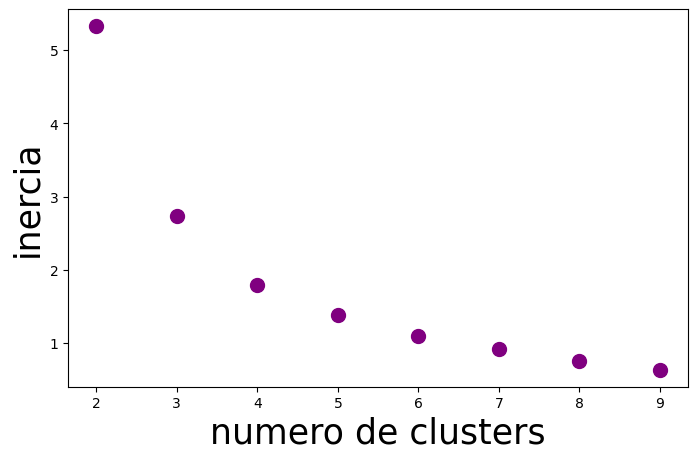

In [18]:
# Creamos una lista vacia en la cual vamos a ir almacenando los valores de la inercia a distinto número de k
inercias = []

# Creamos un bucle en el cual crearemos modelos del algoritmo en un rango de 2 a 9 centroides (k)
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_esc.values)
    inercias.append(kmeans.inertia_) # Calculamos la inercia de cada iteracion y la almacenamos en la lista

# Creamos el gráfico para poder analizar visualmente el metodo
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(range(2,10), inercias, marker="o", s=100, color="purple")
plt.xlabel("numero de clusters", fontsize=25)
plt.ylabel("inercia", fontsize=25)
plt.show()

Podemos ver que el "codo" del gráfico está entre k=4 y k=5. Para continuar con el ejemplo vamos a crear un modelo con k=4, agregamos una columna al dataset con las etiquetas (labels) y veamos como queda graficado.

In [19]:
# Creo el modelo con k=4
kmeans = KMeans(n_clusters=4).fit(df_esc.values)

# Vamos el array de etiquetas
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 1, 1, 3, 2, 3, 1, 3,
       1, 1, 1, 2, 2, 1, 1, 3, 3, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

Agregamos la columna que nos diga a que cluster pertenece el dato

In [20]:
df_esc["Cluster"] = kmeans.labels_

df_esc

,SepalLengthCm,PetalLengthCm,Cluster
0,0.222222,0.067797,0
1,0.166667,0.067797,0
2,0.111111,0.050847,0
3,0.083333,0.084746,0
4,0.194444,0.067797,0
...,...,...,...
145,0.666667,0.711864,1
146,0.555556,0.677966,1
147,0.611111,0.711864,1
148,0.527778,0.745763,1


Y creamos el gráfico

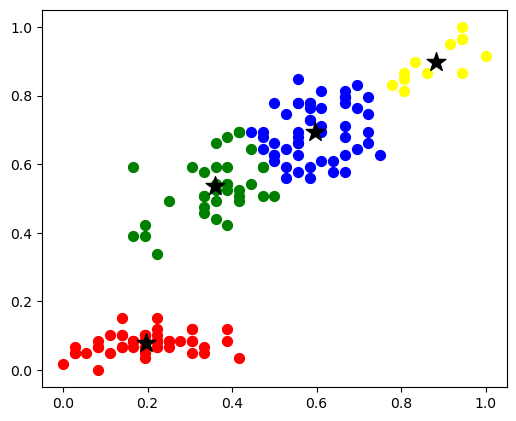

In [21]:
plt.figure(figsize=(6,5), dpi=100)

colores = ["red", "blue", "green", "yellow"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(df_esc[df_esc["Cluster"] == cluster]["SepalLengthCm"],
                df_esc[df_esc["Cluster"] == cluster]["PetalLengthCm"],
                marker="o", s=50, color=colores[cluster])

    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="*", s=200, color="black")

plt.show()

Podemos ver como los datos se agrupan alrededor de las estrellas negras que son nuestros centroides

Si alguno conoce este dataset sabrá que la flor iris se agrupa en tres subgrupos y no en cuatro. Por esto les remarco que el método del codo sirve como guía para empezar a experimentar, pero para determinar el numero adecuado de clusters necesitamos analizar y conocer los datos en profundidad. Dicho esto la metodología que se utiliza al aplicar este algoritmo es siempre muy similar: examinar el dataset, pre-procesar los datos, crear el modelo, evaluar los gráficos y resultados, y asignar etiquetas. En próximos post veremos la aplicación de algoritmos de aprendizaje supervisado, o sea con datos etiquetados. Hasta la próxima!